<h1 align="center"> Projet Fin période SAS </h1>

<h2 align="center"> Développeur Data </h2>

<h3 style="color:RED;"> Importations les bibliothèques nécessaire</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

In [2]:
df=pd.read_csv('Online_Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#sample from the data
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
455197,575607,48194,DOORMAT HEARTS,2,2011-11-10 12:37:00,15.79,14096.0,United Kingdom
420931,572913,21817,GLITTER CHRISTMAS TREE,4,2011-10-26 16:21:00,0.39,15993.0,United Kingdom
218610,556056,22384,LUNCH BAG PINK POLKADOT,1,2011-06-08 13:35:00,1.65,17841.0,United Kingdom
209665,555260,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-06-01 15:34:00,2.95,13263.0,United Kingdom
429733,573576,22196,SMALL HEART MEASURING SPOONS,5,2011-10-31 14:09:00,1.63,14096.0,United Kingdom
381843,569896,22555,PLASTERS IN TIN STRONGMAN,1,2011-10-06 15:58:00,1.65,NaN,United Kingdom
394605,570872,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,1,2011-10-12 16:40:00,1.63,NaN,United Kingdom
351174,567662,21647,ASSORTED TUTTI FRUTTI LARGE PURSE,4,2011-09-21 15:12:00,2.10,17758.0,United Kingdom
520610,580293,21899,GARAGE KEY FOB,20,2011-12-02 13:38:00,0.65,16426.0,United Kingdom
60749,541422,22571,ROCKING HORSE RED CHRISTMAS,1,2011-01-17 17:48:00,1.63,NaN,United Kingdom


## <center>Nettoyage</center>

<h3 style="color:RED;"> La taille totale du Dataset avant le nettoyage des données:</h3>

In [5]:
print(df.shape)

(541909, 8)


<h2> Nettoyage des données:</h2>

 <h3 style="color:RED;"> Il y a des valeurs manquantes dans le Dataset, Mais comment les gérer ?</h3>

#### Il a 24,72 % de valeurs manquantes en CustomerID, donc au lieu de les supprimer,nous les remplacerons en utilisant des méthodes.

In [6]:
print(df.isnull().sum(axis=0))

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
cn = df.loc[(df['CustomerID'].isna()) & (df['UnitPrice'] ==0)]
df = df.drop(cn.index)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
print(df.shape)

(539434, 8)


### Le probleme de CustomerID is null

In [9]:
print(df.isnull().sum(axis=0))

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132605
Country             0
dtype: int64


In [10]:
dfnumsyl = np.sort(df['CustomerID'].unique())
print(dfnumsyl)

[12346. 12347. 12348. ... 18283. 18287.    nan]


In [11]:
missing_ids = df['CustomerID'].isnull()
generated_ids = np.random.randint(18288, 30000, sum(missing_ids)).astype(int)
df.loc[missing_ids, 'CustomerID'] = generated_ids

In [12]:
dfnumsyl = np.sort(df['CustomerID'].unique())
print(dfnumsyl)

[12346. 12347. 12348. ... 29997. 29998. 29999.]


In [13]:
print(df.isnull().sum(axis=0))

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [14]:
# convertir le 'CustomerID' en type entier.
df['CustomerID'] = df['CustomerID'].astype(int)

<h3 style="color:RED;"> Les valeurs aberrantes ou les valeurs extrêmes doivent-elles être corrigées ou supprimées ? comment peut ont faire?</h3>

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,539434.000000,539434.000000,539434.000000
mean,9.870879,4.632270,17462.060135
std,216.079582,96.981068,4420.459023
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14359.000000
50%,3.000000,2.080000,16240.000000
75%,10.000000,4.130000,18237.000000
max,80995.000000,38970.000000,29999.000000


In [16]:
df['Quantity'] = np.abs(df['Quantity'])
df['UnitPrice'] = np.abs(df['UnitPrice'])

In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,539434.000000,539434.000000,539434.000000
mean,10.900010,4.714297,17462.060135
std,216.030113,96.977115,4420.459023
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,14359.000000
50%,3.000000,2.080000,16240.000000
75%,10.000000,4.130000,18237.000000
max,80995.000000,38970.000000,29999.000000


### Le probleme de UnitPrice

In [18]:
zero = df[df['UnitPrice'] == 0]
zero.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom


In [19]:
# Générer une correspondance des descriptions avec les prix moyens
description_prices = df[df['UnitPrice'] > 0].groupby('Description')['UnitPrice'].mean()

# Itérer sur les lignes avec UnitPrice = 0
for index, row in df[df['UnitPrice'] == 0].iterrows():
    description = row['Description']
    if description in description_prices:
        new_price = description_prices[description]
        df.at[index, 'UnitPrice'] = new_price

In [20]:
zero = df[df['UnitPrice'] == 0]
zero

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [21]:
df=df.drop_duplicates()

<h3 style="color:RED;"> La taille totale du Dataset après le nettoyage des données:</h3>

In [22]:
print(df.shape)

(534209, 8)


In [23]:
print(df.isnull().sum(axis=0))

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [24]:
print(df.duplicated().sum())

0


In [25]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,534209.000000,534209.000000,534209.000000
mean,10.973707,4.741298,17478.418351
std,217.064976,97.457759,4436.076446
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14344.000000
50%,3.000000,2.100000,16241.000000
75%,11.000000,4.130000,18272.000000
max,80995.000000,38970.000000,29999.000000


In [26]:
df.to_csv('Cleaned_Online_Retail.csv', index=False)

<h3 style="color:BLACK;"> Analyse les données</h3>

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<h3 style="color:RED;"> Quelle sont les clients qui ont passées plus de commande sur notre site ?</h3>

In [28]:
NbrOfInvoicesByCustomer = df.groupby("CustomerID")["InvoiceNo"].value_counts()
NbrOfInvoicesByCustomer.groupby("CustomerID").count().nlargest(5)

CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
Name: count, dtype: int64

<h3 style="color:RED;"> Quelle est le plus haut montant dépensé par un seul client ?</h3>

In [29]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
total_amounts = df.groupby('CustomerID')['TotalAmount'].sum()

highest_spending_customer = total_amounts.idxmax()
highest_amount_spent = total_amounts.max()

print("Client avec le montant le plus élevé dépensé :", highest_spending_customer)
print("Montant le plus élevé dépensé :", highest_amount_spent)

Client avec le montant le plus élevé dépensé : 16446
Montant le plus élevé dépensé : 336942.1


<h3 style="color:RED;"> Quelles est la description des produits les plus vendus ou acheté par les clients dans notre site ?</h3>

In [30]:
top_product_descriptions = df.groupby('Description')['Quantity'].sum().nlargest(5).index
for description in top_product_descriptions:
    print(description)

PAPER CRAFT , LITTLE BIRDIE
MEDIUM CERAMIC TOP STORAGE JAR
WORLD WAR 2 GLIDERS ASSTD DESIGNS
JUMBO BAG RED RETROSPOT
WHITE HANGING HEART T-LIGHT HOLDER


<h3 style="color:RED;"> Quel est le nombre moyen de produits vendus par jour, mois ?</h3>

In [31]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

products_per_day = df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum()

mean_products_per_day = products_per_day.mean()

print("Nombre moyen de produits vendus par jour :", int(mean_products_per_day))
# Obtenez le top 5 des jours avec le plus grand nombre de produits vendus
top_5_days = products_per_day.nlargest(5)
print("Top 5 days with the highest number of products sold:")
print(top_5_days)

Nombre moyen de produits vendus par jour : 19220
Top 5 days with the highest number of products sold:
InvoiceDate
2011-12-09    174979
2011-01-18    157209
2011-11-14     47429
2011-10-05     46399
2011-12-05     44622
Name: Quantity, dtype: int64


In [32]:
products_per_month = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

mean_products_per_month = products_per_month.mean()

print("Nombre moyen de produits vendus par mois :", int(mean_products_per_month))
# Obtenez le top 5 des mois avec le plus grand nombre de produits vendus
top_5_months = products_per_month.nlargest(5)
print("Top 5 months with the highest number of products sold:")
print(top_5_months)

Nombre moyen de produits vendus par mois : 450942
Top 5 months with the highest number of products sold:
InvoiceDate
2011-11    776811
2011-10    644004
2011-09    576907
2011-01    467053
2011-08    434186
Freq: M, Name: Quantity, dtype: int64


<h3 style="color:RED;"> Quelle est la répartition géographique des ventes ?</h3>

In [33]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [34]:
pd.options.display.float_format = '{:.2f}'.format
sales_by_country = df.groupby('Country')['TotalAmount'].sum()
sales_by_country.head()

Country
Australia   141029.26
Austria      10243.04
Bahrain        959.88
Belgium      41481.72
Brazil        1143.60
Name: TotalAmount, dtype: float64

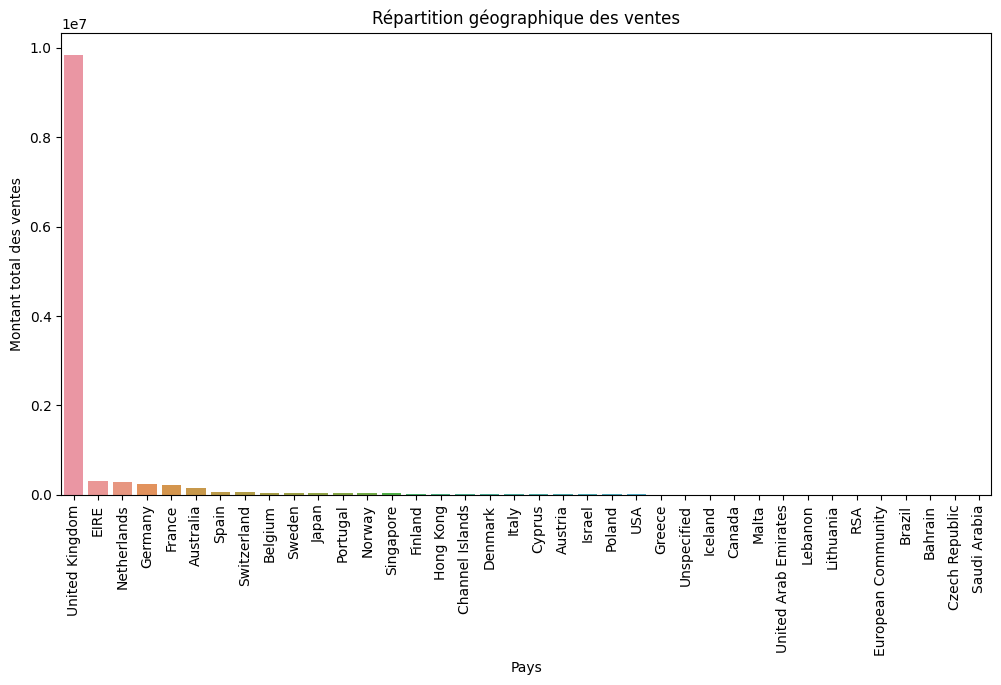

In [35]:
sales_by_country = df.groupby('Country')['TotalAmount'].sum()
sales_by_country = sales_by_country.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values)

plt.title("Répartition géographique des ventes")
plt.xlabel("Pays")
plt.ylabel("Montant total des ventes")

plt.xticks(rotation=90)

plt.show()

### Meme répartition géographique des ventes hors United Kingdom

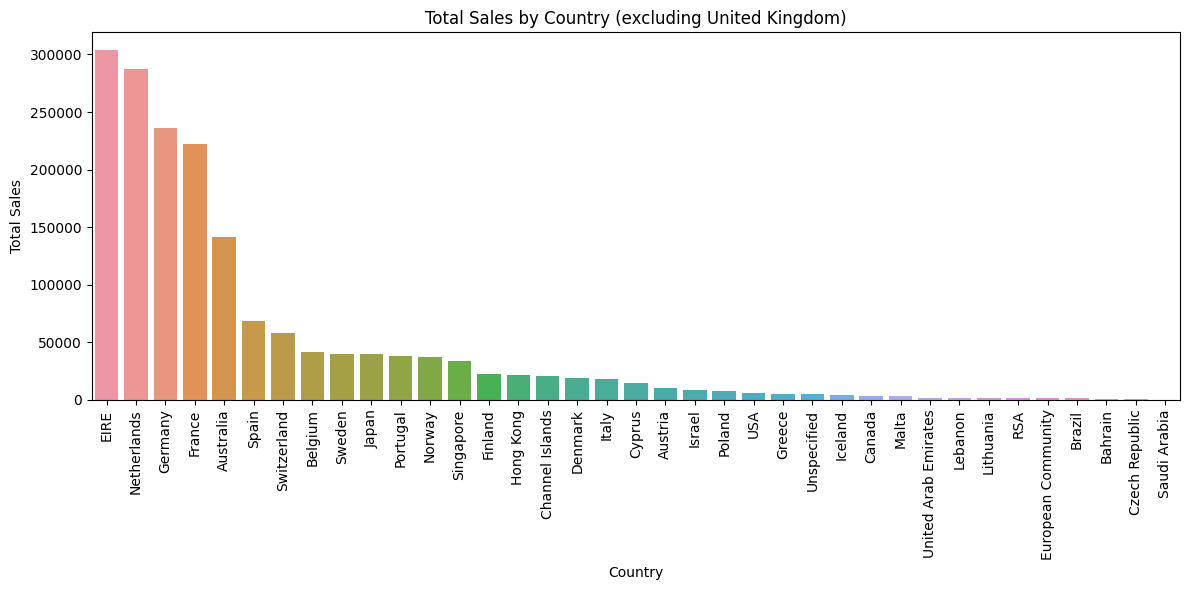

In [36]:
sales_by_country = df.groupby('Country')['TotalAmount'].sum()
sales_by_country = sales_by_country[sales_by_country.index != 'United Kingdom']
sales_by_country = sales_by_country.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values)

plt.title("Total Sales by Country (excluding United Kingdom)")
plt.xlabel("Country")
plt.ylabel("Total Sales")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


<h3 style="color:RED;"> Quelle est la tendance des ventes au fil du temps, tracer un graphique de la croissance des ventes ?</h3>

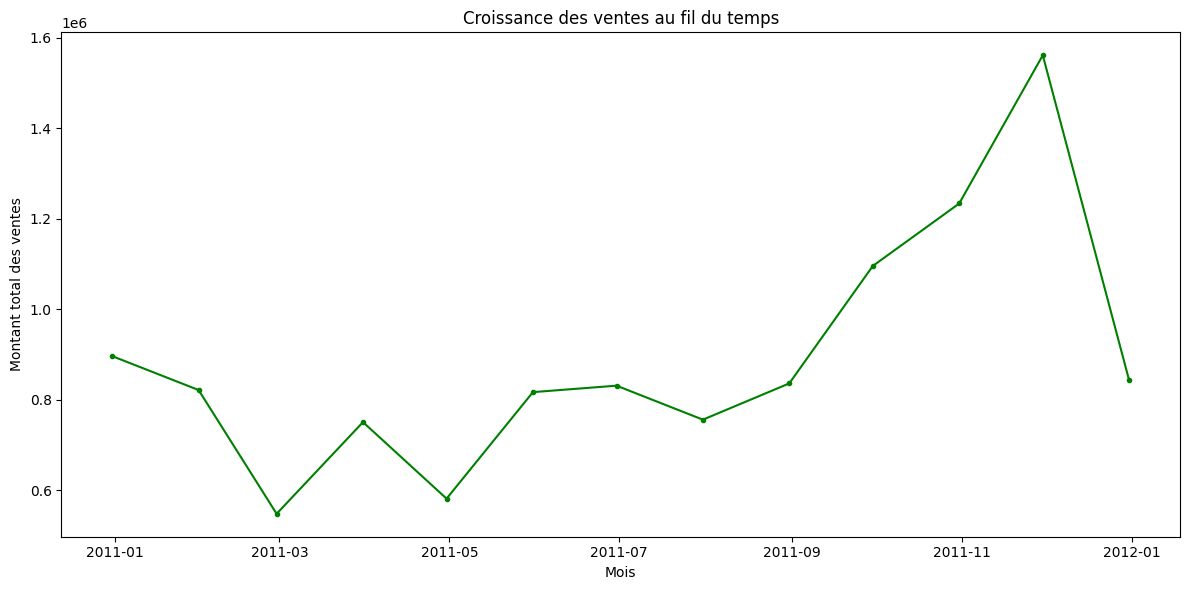

In [37]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

monthly_sales = df.resample('M', on='InvoiceDate')['TotalAmount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, 'g.-')

plt.title("Croissance des ventes au fil du temps")
plt.xlabel("Mois")
plt.ylabel("Montant total des ventes")

plt.xticks()
plt.tight_layout()

plt.show()

<h3 style="color:RED;"> Quelle est la saisonnalité des ventes ?</h3>

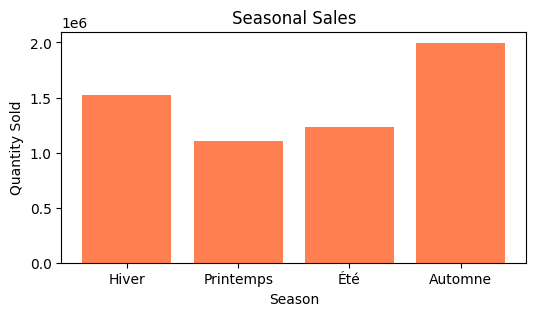

In [38]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Season'] = (df['InvoiceDate'].dt.month % 12 + 3) // 3

seasonal_quantity = df.groupby('Season')['Quantity'].sum()

season_names = {1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'}

plt.figure(figsize=(6, 3))
plt.bar(seasonal_quantity.index.map(season_names.get), seasonal_quantity.values, color=['coral'])
plt.xlabel('Season')
plt.ylabel('Quantity Sold')
plt.title('Seasonal Sales')
plt.show()

<h3 style="color:RED;"> Quel est le chiffre d'affaires total réalisé par le site de vente en ligne sur une période donnée (par exemple année 2011)?</h3>

In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

start_date = pd.to_datetime('2011-01-01')
end_date = pd.to_datetime('2011-12-31')
filtered_df = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]

total_revenue = filtered_df['TotalAmount'].sum()

print('Le chiffre d\'affaires total pour l\'année 2011 est de :', total_revenue)

Le chiffre d'affaires total pour l'année 2011 est de : 10675362.193292782


<h3 style="color:RED;"> Quels sont les moments du jour (matin, après-midi, soir) que les clients achètent le plus ?</h3>

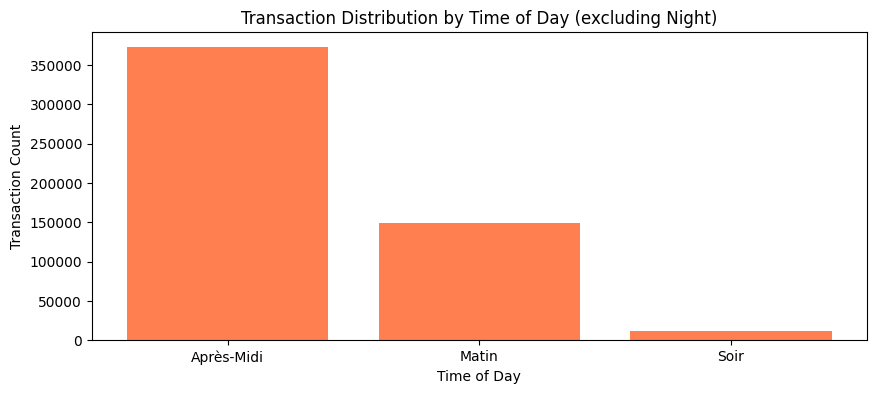

In [40]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Hour'] = df['InvoiceDate'].dt.hour

bins = [6, 12, 18, 24]
labels = ['Matin', 'Après-Midi', 'Soir']
df['Daytime'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)

transaction_count = df['Daytime'].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(transaction_count.index, transaction_count.values, color=['coral'])
plt.xlabel('Time of Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Distribution by Time of Day (excluding Night)')
plt.show()

<h3 style="color:RED;"> Quelle est la distribution des prix des produits ?</h3>

In [41]:
df['disprix'] = ''

Condition1 = (df['UnitPrice'] > 0) & (df['UnitPrice'] <= 10)
Condition2 = (df['UnitPrice'] > 10) & (df['UnitPrice'] <= 20)
Condition3 = (df['UnitPrice'] > 20) & (df['UnitPrice'] <= 50)
Condition4 = (df['UnitPrice'] > 50) & (df['UnitPrice'] <= 100)
Condition5 = (df['UnitPrice'] > 100) & (df['UnitPrice'] <= 200)
Condition6 = (df['UnitPrice'] > 200) & (df['UnitPrice'] <= 500)
Condition7 = df['UnitPrice'] > 500

df.loc[Condition1 , 'disprix'] = '0-10'
df.loc[Condition2 , 'disprix'] = '10-20'
df.loc[Condition3 , 'disprix'] = '20-50'
df.loc[Condition4 , 'disprix'] = '50-100'
df.loc[Condition5 , 'disprix'] = '100-200'
df.loc[Condition6 , 'disprix'] = '200-500'
df.loc[Condition7 , 'disprix'] = '500+'

In [42]:
distribution_des_prix = df.groupby('disprix')['UnitPrice'].nunique()
distribution_des_prix

disprix
0-10       465
10-20      125
100-200    334
20-50      126
200-500    274
50-100     122
500+       215
Name: UnitPrice, dtype: int64

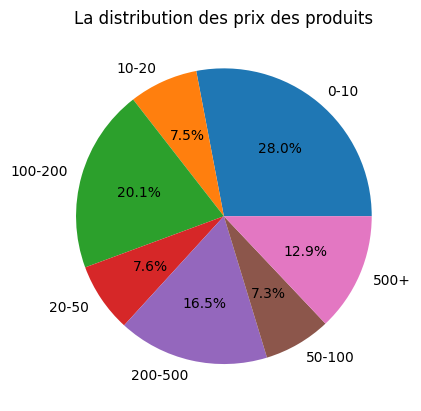

In [43]:
#Create A graph Pie :

plt.pie(distribution_des_prix,labels = distribution_des_prix.index,autopct='%1.1f%%')

#Add labels and title
plt.title('La distribution des prix des produits')
plt.xticks(rotation= 45) # for show the lable 
#Display the graph
plt.show()

# Partie SQL

## Insertion des données nettoyées dans la base de données SQL

In [44]:
ndf=pd.read_csv('Cleaned_Online_Retail.csv')
ndf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [45]:
# Créez la connexion
connection = pyodbc.connect('DRIVER={SQL SERVER} ;SERVER=LAPTOP-QJ16KG8Q\SQLEXPRESS;DATABASE=datagestion')

In [46]:
cursor = connection.cursor()

In [ ]:
cursor.execute('''
    CREATE TABLE Retail1(
        InvoiceNo varchar(255),
        StockCode varchar(255),
        Description varchar(255),
        Quantity int,
        InvoiceDate date,
        UnitPrice float,
        CustomerID int,
        Country varchar(255)
    )
''')

In [48]:
connection.commit()

In [ ]:
for row in df.itertuples():
    cursor.execute('''
    INSERT INTO Retail1 (
        InvoiceNo,
        StockCode,
        Description,
        Quantity,
        InvoiceDate,
        UnitPrice,
        CustomerID,
        Country 
    )
                VALUES (?,?,?,?,?,?,?,?)
                ''',
        row.InvoiceNo,
        row.StockCode,
        row.Description,
        row.Quantity,
        row.InvoiceDate,
        row.UnitPrice,
        row.CustomerID,
        row.Country 
                )
connection.commit()

In [ ]:
print(df.isnull().sum(axis=0))

## Création des requêtes afin de vérifier des informations du Dataset

In [ ]:
cursor.execute("SELECT * FROM Retail where CustomerID IS NULL")
result1 = cursor.fetchall()
for row in result1:
    print(row)
cursor.execute("SELECT * FROM Retail WHERE description IS NULL")
result2 = cursor.fetchall()
for row in result2:
    print(row)
cursor.execute("SELECT * FROM Retail WHERE UnitPrice = 0.00")
result3 = cursor.fetchall()
for row in result3:
    print(row)    

In [ ]:
cursor.execute("SELECT AVG(Quantity) FROM Retail as Quantity_UK WHERE country='United Kingdom';")
result6 = cursor.fetchall()
for row in result6:
    print(row)

## Création une nouvelle Table SQL qui stockent seulement Customer ID et le montant total qu’il a dépensé chaque année dans notre site 

In [ ]:
cursor.execute('''
    CREATE TABLE CustomerSpending (
      PRIMARY KEY (CustomerID) INT ,
      TotalSpending DECIMAL(10, 2),
      FOREIGN KEY (Year) REFERENCES Retail(Year)
    );
''')

connection.commit()

In [ ]:
cursor.execute('''
    INSERT INTO CustomerSpending (CustomerID, Year, TotalSpending)
SELECT
  CustomerID,
  YEAR(CONVERT(DATE, InvoiceDate)) AS Year,
  SUM(UnitPrice * Quantity) AS TotalSpending
FROM
  Retail
GROUP BY
  CustomerID,
  YEAR(CONVERT(DATE, InvoiceDate));
''')
connection.commit()

In [ ]:
cursor.close()
connection.close()